In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from prophet import Prophet

In [7]:
store_demand_data = pd.read_csv("../Projects/Store_Item_Demand/Store_Item_Demand_Data/train.csv")

In [41]:
store_demand_data.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [42]:
store_demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    913000 non-null  datetime64[ns]
 1   store   913000 non-null  int64         
 2   item    913000 non-null  int64         
 3   sales   913000 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [43]:
store_demand_data_cleand = store_demand_data.drop(columns=['store','item'])

In [44]:
store_demand_data_cleand.columns = ['ds','y']

In [45]:
store_demand_data_cleand

,ds,y
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10
...,...,...
912995,2017-12-27,63
912996,2017-12-28,59
912997,2017-12-29,74
912998,2017-12-30,62


In [46]:
model_store_demand_data = Prophet()

In [47]:
model_store_demand_data.fit(store_demand_data_cleand)

18:06:31 - cmdstanpy - INFO - Chain [1] start processing
18:07:39 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = model_store_demand_data.make_future_dataframe(periods=365)
forecast = model_store_demand_data.predict(future)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


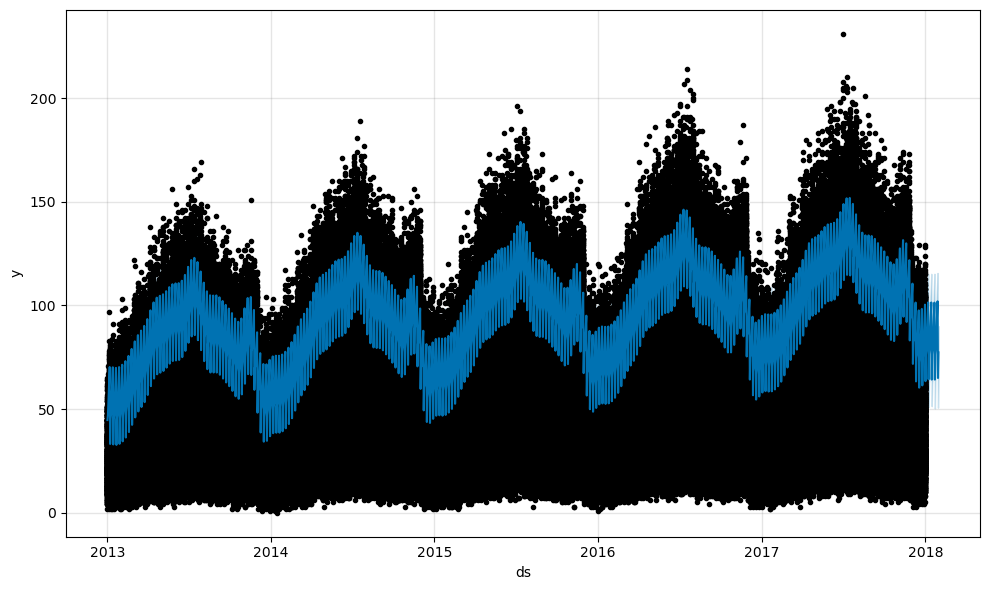

In [48]:
fig = model_store_demand_data.plot(forecast)

/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/lib/python3.12/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

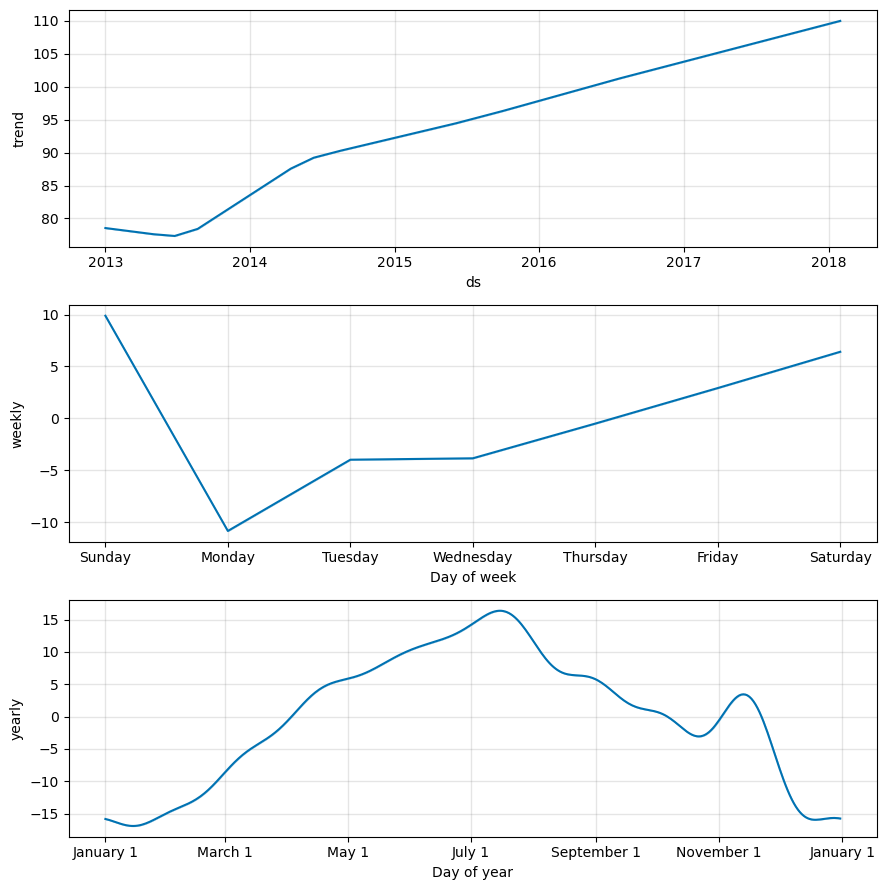

In [49]:
fig2 = model_store_demand_data.plot_components(forecast)

In [36]:
m = Prophet()

In [27]:
store_ids = store_demand_data['store'].unique()
item_ids = store_demand_data['item'].unique()

all_forecasts = []

for store_id in store_ids:
    for item_id in item_ids:
        # Filter data for the specific store-item combination
        df_filtered = store_demand_data[(store_demand_data['store'] == store_id) & 
                                        (store_demand_data['item'] == item_id)]
        df_filtered = df_filtered.rename(columns={'date': 'ds', 'sales': 'y'})
        df_filtered = df_filtered[['ds', 'y']]

        # Fit the model
        m = Prophet()
        m.fit(df_filtered)

        # Make future predictions
        future = m.make_future_dataframe(periods=30)
        forecast = m.predict(future)

        # Add store and item information to the forecast
        forecast['store'] = store_id
        forecast['item'] = item_id

        # Append the forecast to the list
        all_forecasts.append(forecast)

# Combine all forecasts into a single DataFrame
forecast_df = pd.concat(all_forecasts)

# Now you have a DataFrame with forecasts for all store-item combinations


17:25:58 - cmdstanpy - INFO - Chain [1] start processing
17:25:59 - cmdstanpy - INFO - Chain [1] done processing
17:25:59 - cmdstanpy - INFO - Chain [1] start processing
17:25:59 - cmdstanpy - INFO - Chain [1] done processing
17:25:59 - cmdstanpy - INFO - Chain [1] start processing
17:25:59 - cmdstanpy - INFO - Chain [1] done processing
17:25:59 - cmdstanpy - INFO - Chain [1] start processing
17:25:59 - cmdstanpy - INFO - Chain [1] done processing
17:26:00 - cmdstanpy - INFO - Chain [1] start processing
17:26:00 - cmdstanpy - INFO - Chain [1] done processing
17:26:00 - cmdstanpy - INFO - Chain [1] start processing
17:26:00 - cmdstanpy - INFO - Chain [1] done processing
17:26:00 - cmdstanpy - INFO - Chain [1] start processing
17:26:00 - cmdstanpy - INFO - Chain [1] done processing
17:26:00 - cmdstanpy - INFO - Chain [1] start processing
17:26:00 - cmdstanpy - INFO - Chain [1] done processing
17:26:01 - cmdstanpy - INFO - Chain [1] start processing
17:26:01 - cmdstanpy - INFO - Chain [1]

In [28]:
specific_stores = [1, 2]  # Example store IDs
specific_items = [1, 10]  # Example item IDs


In [34]:
forecasts = []

store_demand_data['date'] = pd.to_datetime(store_demand_data['date'])

for store_id in specific_stores:
    for item_id in specific_items:
        # Filter data for the specific store-item combination
        df_filtered = store_demand_data[(store_demand_data['store'] == store_id) & 
                                        (store_demand_data['item'] == item_id)]
        df_filtered = df_filtered.rename(columns={'date': 'ds', 'sales': 'y'})
        df_filtered = df_filtered[['ds', 'y']]

        # Fit the model
        m = Prophet()
        m.fit(df_filtered)

        # Make future predictions
        future = m.make_future_dataframe(periods=30)  # Forecasting for the next 30 days
        forecast = m.predict(future)

        # Add store and item information to the forecast
        forecast['store'] = store_id
        forecast['item'] = item_id

        # Append the forecast to the list
        forecasts.append(forecast)



18:04:44 - cmdstanpy - INFO - Chain [1] start processing
18:04:44 - cmdstanpy - INFO - Chain [1] done processing
18:04:44 - cmdstanpy - INFO - Chain [1] start processing
18:04:44 - cmdstanpy - INFO - Chain [1] done processing
18:04:44 - cmdstanpy - INFO - Chain [1] start processing
18:04:44 - cmdstanpy - INFO - Chain [1] done processing
18:04:44 - cmdstanpy - INFO - Chain [1] start processing
18:04:44 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
forecast_df = pd.concat(forecasts)


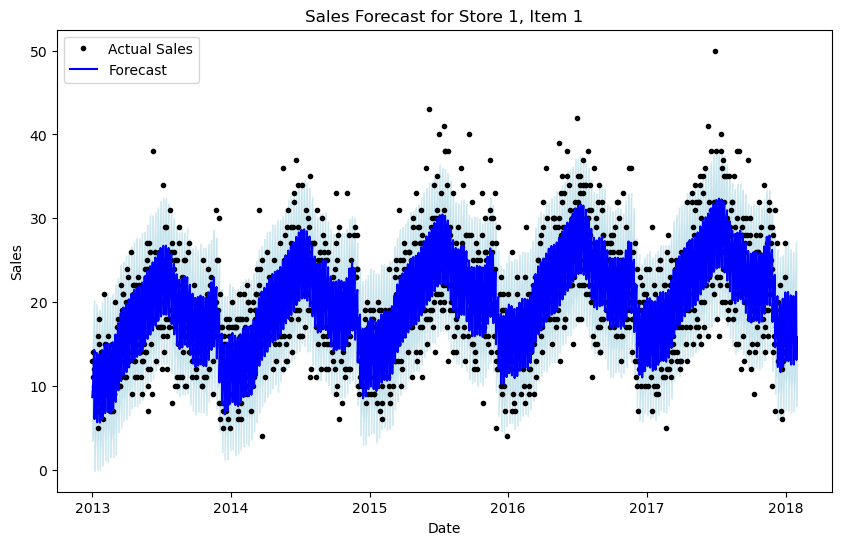

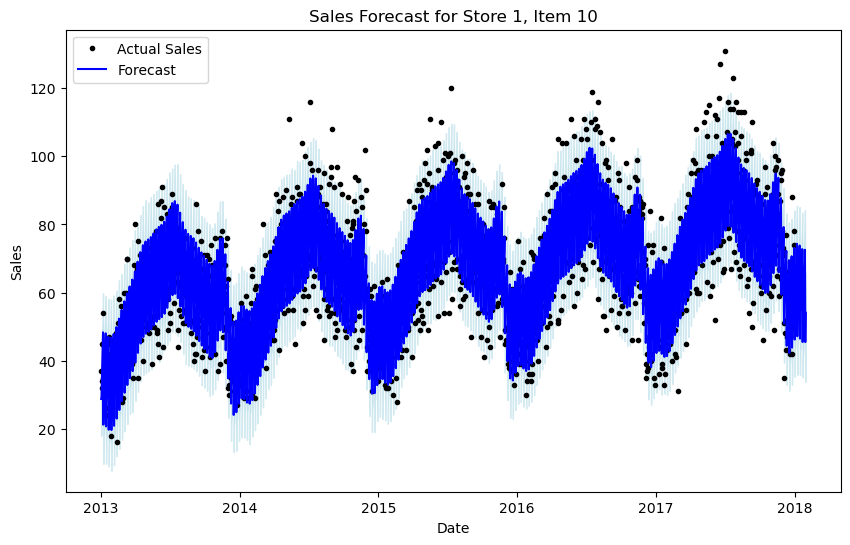

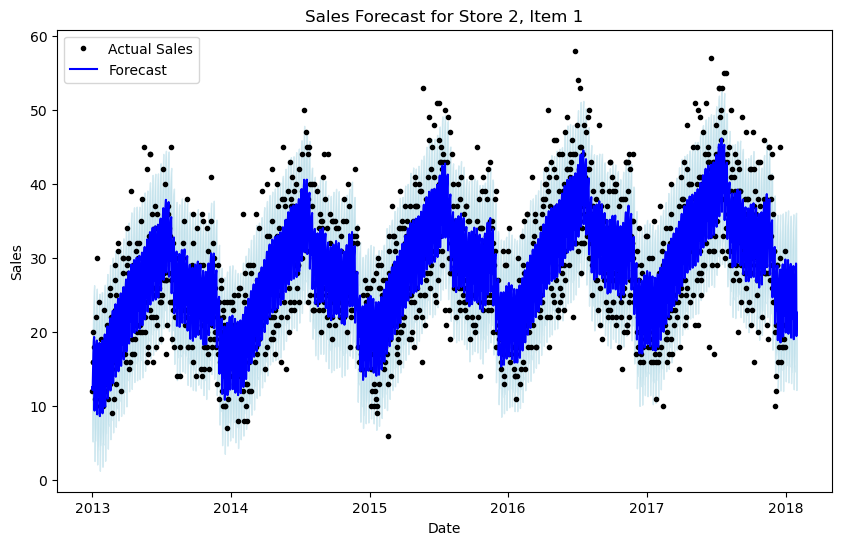

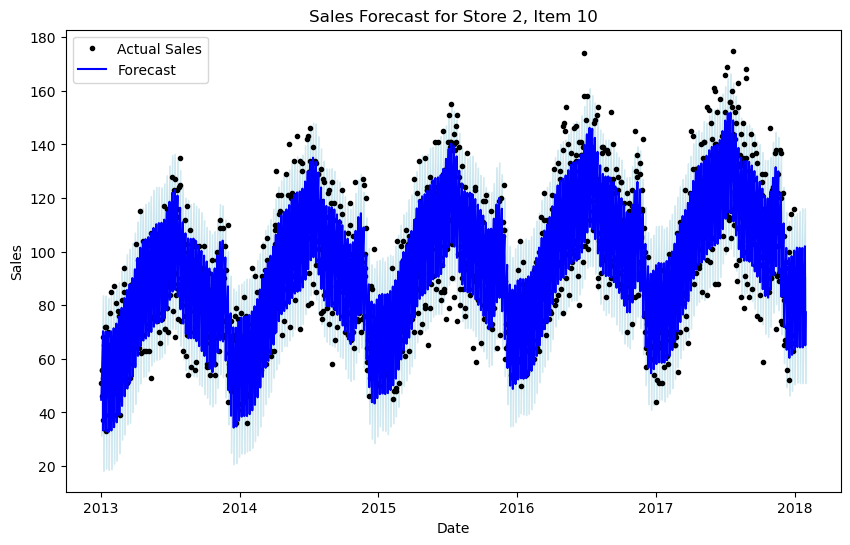

In [35]:
# Visualize forecast for each store-item combination
for store_id in specific_stores:
    for item_id in specific_items:
        # Filter the forecast data
        forecast_filtered = forecast_df[(forecast_df['store'] == store_id) & 
                                        (forecast_df['item'] == item_id)]
        
        # Plotting the actual sales data
        df_filtered = store_demand_data[(store_demand_data['store'] == store_id) & 
                                        (store_demand_data['item'] == item_id)]
        df_filtered = df_filtered.rename(columns={'date': 'ds', 'sales': 'y'})

        plt.figure(figsize=(10, 6))
        plt.plot(df_filtered['ds'], df_filtered['y'], 'k.', label='Actual Sales')
        
        # Plotting the forecasted data
        plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], 'b-', label='Forecast')
        plt.fill_between(forecast_filtered['ds'], forecast_filtered['yhat_lower'], forecast_filtered['yhat_upper'], color='lightblue', alpha=0.5)

        # Adding labels and title
        plt.title(f'Sales Forecast for Store {store_id}, Item {item_id}')
        plt.xlabel('Date')
        plt.ylabel('Sales')
        plt.legend()

        # Show plot
        plt.show()
